# INFO 1998 Final Project
#### Zack Hurwitz and Atreya Iyer

In [107]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [108]:
oly = pd.read_csv("athlete_events.csv")

In [109]:
winners = oly.dropna()
oly["Medal"] = oly["Medal"].fillna("No Medal")
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [110]:
oly_data = oly.drop(["ID", "Name", "Team", "NOC", "Games", "Season", "City", "Event"], axis=1)
oly_data = oly_data[oly_data["Sport"] == "Swimming"].dropna()
oly_data = oly_data[oly_data["Sex"] == "M"]
oly_data = oly_data.drop(["Sex", "Sport"], axis=1)
oly_data.head()

,Age,Height,Weight,Year,Medal
100,21.0,194.0,78.0,1996,No Medal
101,21.0,194.0,78.0,1996,No Medal
102,21.0,194.0,78.0,1996,No Medal
103,25.0,194.0,78.0,2000,No Medal
104,25.0,194.0,78.0,2000,No Medal


In [111]:
cleanup_nums = {"Medal": {"No Medal": 0, "Gold": 1, "Silver": 2, "Bronze": 3}}
oly_data.replace(cleanup_nums, inplace = True)

In [112]:
medals = oly_data["Medal"]

In [113]:
from collections import Counter
c = Counter(medals)
print(c)
inputs = oly_data.drop(["Medal"], axis=1)

Counter({0: 9002, 1: 489, 2: 423, 3: 407})


In [114]:
def predict(model, targets, inputs):
    x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
    
    model.fit(x_train, y_train)
    model.predict(x_test)
    print("Score:", model.score(x_test, y_test))
    
    print("Cross-validation of values")
    print(cross_val_score(model, inputs, targets, cv=4, scoring="accuracy"))

In [115]:
dtc = DecisionTreeClassifier()
GRID = GridSearchCV(dtc,
                    param_grid={'max_depth': [5, 10, 20],
                                'max_leaf_nodes': [5, 10, 20, 50],
                                'min_samples_split': [5, 10, 20, 50]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

The parameters of the best model are: 
{'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_split': 5}


In [116]:
dtc = DecisionTreeClassifier(max_depth=5, max_features=None, max_leaf_nodes=5,
                             min_samples_split=5)
predict(dtc, medals, inputs)

Score: 0.87215496368
Cross-validation of values
[ 0.8718048   0.87214258  0.87209302  0.87276959]


In [117]:
# knn = KNeighborsClassifier()
# GRID = GridSearchCV(knn,
#                     param_grid={'n_neighbors': [2, 5, 10, 20],
#                                 'p': [1, 2, 3],
#                                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                                 'leaf_size': [10, 30, 50, 100]},
#                     scoring='accuracy',
#                     cv=2, n_jobs=-1)
# GRID.fit(inputs, medals)
# print('The parameters of the best model are: ')
# print(GRID.best_params_)

In [118]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=20, p=1)
predict(knn, medals, inputs)

Score: 0.871670702179
Cross-validation of values
[ 0.86986832  0.87098024  0.87015504  0.8716059 ]


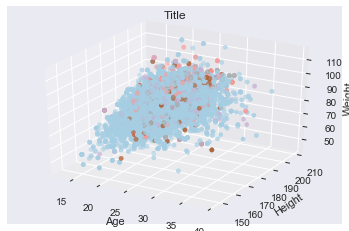

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(oly_data['Age'], oly_data['Height'], oly_data['Weight'], c=medals, cmap=plt.cm.Paired)

# colors = plt.cm.get_cmap('Paired')
# for medal in np.unique(medals):
#     ix = np.where(inputs[0] == medal)
#     ax.scatter(oly_data['Age'].loc[ix],oly_data['Height'].loc[ix],oly_data['Weight'], c = colors(medals), label = oly_data.target_names[medals])


ax.set_title('Title')
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')

plt.show()
